# Chapter 2. 자연어와 단어의 분산 표현

> 딥러닝 등장 이전에의 쓰이던 고전 기법들에 대한 소개


### 자연어 처리
> 우리의 말을 컴퓨터에게 이해시키기 위한 기술(분야) <br/><br/>
> **응용 분야** <br/>
> 검색 엔진, 기계 번역, 질의응답 시스템, IME(입력기 전환), 문장 자동요약, 감정 분석

### 단어의 의미
> '문자' - 말 <br/>
> '단어' - 말의 의미 <br/>
> **단어는 의미를 이루는 최소단위이다.**

### 시소러스 기반 기법 (by Human)
> 유의어 사전, 유의어나 동의어가 한 분류로 분류되어 있다. <br/>
> - **자연어 처리에서의 시소러스는 '상위/하위', '전체/부분' 등 더 세세한 관계를 정의** <br/>
> - 단어들의 관계를 그래프로 표현하여 단어의 연결을 정의 (단어 네트워크) <br/>
> - **WordNet** : 프리스턴 대학교에서 1985년 부터 구축하기 시작한 NLP 분야에서 가장 유명한 시소러스
> - **문제점** : 시대 변화에 대한 대응이 어려움(신조어 및 바뀌는 단어의 의미), 큰 인적 비용 발생, 미묘한 차이(용법)를 표현할 방법 없음.

### 통계 기반 기법
> '말뭉치(corpus)' - 대량의 텍스트 데이터, 주로 자연어 처리나 응용을 염두해두고 모은 데이터 <br/>
> **목표** : 사람의 지식으로 가득한 말뭉치에서 자동으로, 효율적으로 그 핵심을 추출하는 것. <br/>
> 추가 레이블(품사와 같은 추가 정보가 컴퓨터가 이해하기 좋은 이진 형태로 레이블링)이 구성될 수 있으나 이 책에서는 추가 레이블 없는 큰 말뭉치가 있다는 가정하에 진행할 것임.

### 파이썬으로 말뭉치 전처리(Pre-processing)

In [29]:
txt = 'I was a car and you drived that car.'
txt = txt.lower() # 문장의 첫머리도 똑같이 취급하기 위해 모두 소문자화 하기
txt = txt.replace('.',' .') # 마침표 고려 - 공백열 + 온점으로 바꿈
words1 = txt.split(' ') # 공백열 기준으로 분할
words1

['i', 'was', 'a', 'car', 'and', 'you', 'drived', 'that', 'car', '.']

> 단어를 분할 할 때, 정규표현식 모듈인 re를 import 하여 단어 분할을 실행할 수도 있음.ㅠ

In [30]:
import re

txt = 'I was a car and you drived that car.'
txt = txt.lower()
words2 = re.split('(\W+)?', txt)
words2

['',
 None,
 'i',
 ' ',
 '',
 None,
 'w',
 None,
 'a',
 None,
 's',
 ' ',
 '',
 None,
 'a',
 ' ',
 '',
 None,
 'c',
 None,
 'a',
 None,
 'r',
 ' ',
 '',
 None,
 'a',
 None,
 'n',
 None,
 'd',
 ' ',
 '',
 None,
 'y',
 None,
 'o',
 None,
 'u',
 ' ',
 '',
 None,
 'd',
 None,
 'r',
 None,
 'i',
 None,
 'v',
 None,
 'e',
 None,
 'd',
 ' ',
 '',
 None,
 't',
 None,
 'h',
 None,
 'a',
 None,
 't',
 ' ',
 '',
 None,
 'c',
 None,
 'a',
 None,
 'r',
 '.',
 '',
 None,
 '']

In [31]:
word_to_id = {}
id_to_word = {}

for word in words1:
    if word not in word_to_id:
        new_id = len(word_to_id)
        word_to_id[word] = new_id
        id_to_word[new_id] = word

In [32]:
word_to_id

{'i': 0,
 'was': 1,
 'a': 2,
 'car': 3,
 'and': 4,
 'you': 5,
 'drived': 6,
 'that': 7,
 '.': 8}

In [33]:
id_to_word

{0: 'i',
 1: 'was',
 2: 'a',
 3: 'car',
 4: 'and',
 5: 'you',
 6: 'drived',
 7: 'that',
 8: '.'}

In [34]:
word_to_id['car']

3

In [35]:
id_to_word[1]

'was'

#### 단어 목록을 단어 ID 목록으로 변경해보자!

In [36]:
!pip3 install numpy

In [37]:
import numpy as np
corpus = [word_to_id[w] for w in words1]
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 5, 6, 7, 3, 8])

#### 전처리를 한데 모아!

In [38]:
def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')
    
    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word
    corpus = np.array([word_to_id[w] for w in words])
    
    return corpus, word_to_id, id_to_word

#### 실행해보자!

In [42]:
text = 'You and I are really happy to meet you guys.' # 말도 안대지만 you를 두번 쓰고 싶었음.
corpus, word_to_id, id_to_word = preprocess(text)
corpus

array([0, 1, 2, 3, 4, 5, 6, 7, 0, 8, 9])

In [43]:
word_to_id

{'you': 0,
 'and': 1,
 'i': 2,
 'are': 3,
 'really': 4,
 'happy': 5,
 'to': 6,
 'meet': 7,
 'guys': 8,
 '.': 9}

In [44]:
id_to_word

{0: 'you',
 1: 'and',
 2: 'i',
 3: 'are',
 4: 'really',
 5: 'happy',
 6: 'to',
 7: 'meet',
 8: 'guys',
 9: '.'}

### 단어의 분산 표현
> - RGB 색상표 처럼 단어의 의미를 더 정확하게 파악할 수 있는 벡터 표현<br/>
> - 단어를 고정 길이의 **밀집 벡터(dense vector)** 로 표현 <br/>
> **밀집 벡터(dense vector)** : 원소가 0이 아닌 실수인 벡터
> - **분포 가설(distributional hypothesis)** : 단어의 의미는 주변 단어에 의해 형성된다. 단어 자체에는 의미가 없지만 그 단어가 사용된 **맥락(context), 즉 주변 단어** 가 의미를 형성<br/>
> - 맥락의 크기 == 윈도우 크기(windwo size)
> **ex)** You and I are really happy to meet you guys. <br/>
> **퀘-스천!** 만약 'happy'를 기준으로 윈도우 크기가 2라면?

### 동시발생 행렬
> 어떤 단어가 몇번이나 등장했는가? 세어서 집계 <br/>
> **퀘-스천!** 만약 'you'를 기준으로 산정한다면? <br/>
> 냉-철한 엔지니어는 모든 것을 자동화 하지! 

In [46]:
def create_co_matrix(corpus, vocab_size, window_size=1):
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)
    
    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size+1):
            left_idx = idx - i
            right_idx = idx + i
            
            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] +=1
                
                if right_idx < corpus_size:
                    right_word_id = corpus[right_idx]
                    co_matrix[word_id, right_word_id] += 1
                    
    return co_matrix

### 벡터 간 유사도 측정
> 코사인 유사도(cosine similarity) 이용 <br/>
> **두 벡터가 가리키는 방향이 얼마나 비슷한가?** <br/>
> 1(같음) or -1(반대)
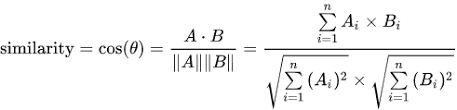
> 벡터를 정규화 한 후에, 내적을 구함.

In [49]:
def cos_similarity(x, y):
    nx = x / np.sqrt(np.sum(x**2)) # numpy 배열이라고 가정
    ny = y / np.sqrt(np.sum(y**2)) # numpy 배열이라고 가정
    return np.dot(nx, ny)

### 오-노!
> 제로 벡터가 들어오면 Divide by zero 오류가 발생<br/>
> 분모에 작은 값을 더해줌으로써 해결! 매우 작은 값은 부동소수점 계산시 반올림 되어 다른 값에 흡수되어서 최종 계산 결과를 어지럽힐까 걱정 댓츠 노-노!

In [50]:
def cos_similarity(x, y, eps =1e-8):
    nx = x / np.sqrt(np.sum(x**2) + eps) # numpy 배열이라고 가정
    ny = y / np.sqrt(np.sum(y**2) + eps) # numpy 배열이라고 가정
    return np.dot(nx, ny)

### 유사 단어의 랭킹 표시
> 어떤 단어가 나랑 제일 인접할까(관계가 많을까)?

In [56]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    # 1. 검색어를 꺼낸다.
    if query not in word_to_id:
        print('$s(을)를 찾을 수 없습니다.' %query)
        return
    
    print ('\n[query] ' + query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]
    
    # 2. 코사인 유사도 계산
    vocab_size = len(id_to_word)
    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)
        
    # 3. 코사인 유사도를 기준으로 내림차순으로 출력
    count = 0
    for i in (-1 * similarity).argsort():
        if id_to_word[i] == query :
            continue
        print(' %s: %s' % (id_to_word[i], similarity[i]))
        
        count += 1
        if count >= top:
            return

#### 여기서 잠깐!

In [57]:
# argsort() 메소드는 넘파이 배열의 원소를 오름차순으로 정렬
x = np.array([100, -20, 2])
x.argsort()

array([1, 2, 0])

In [58]:
(-x).argsort()

array([0, 2, 1])

In [59]:
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

most_similar('you', word_to_id, id_to_word, C, top=5)


[query] you
 .: 0.7071067758832467
 to: 0.49999999749999996
 and: 0.0
 i: 0.0
 are: 0.0


### 통계 기반 기법 개선하기
> 상호정보량 : 단순히 빈도수가 높다고 해서 의미 있는 것은 아님. <br/>
> - **점별 상호정보량(PMI : Pointwise Mutual Information)**
> - **차원 감소**
> - **PTB 데이터셋 평가**